In [1]:
pip install pystan

In [2]:
pip install fbprophet

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
#Checking for Null Values in the dataset
data.isnull().sum().sort_values(ascending = True)

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [7]:
#Converting the column to date time
data['FullDate'] = pd.to_datetime(data['FullDate'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [9]:
data.shape

(92016, 5)

In [10]:
df = data[['FullDate', 'ElecPrice']]
df.head()

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [12]:
df

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [13]:
data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [14]:
data
data.set_index('FullDate', inplace=True)
data = data.resample('D').sum()
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [15]:
data = data.reset_index()

**Question_12**

Answer SysLoad: 0.004254

Answer GasPrice : 0.045027

In [16]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [17]:
p_val = 0.004253725504574117
print(round(p_val, 6))

0.004254


In [18]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [19]:
p_val = 0.04502721288462542
print(round(p_val, 6))

0.045027


**Question_13**

Gas Price 10% : -2.5672

ElecPrice 5% : -2.8623

In [20]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


In [21]:
gas_price = -2.5671743978048323
print(round(gas_price, 4))

-2.5672


In [22]:
elec_price = -2.8622983040036005
print(round(elec_price, 4))

-2.8623


**Question_14**

Answer: 549.48

In [23]:
df.columns = ['ds', 'y']

In [24]:
df.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [25]:
df.set_index('ds', inplace=True)

In [26]:
df = df.resample('D').sum()
df.head()

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


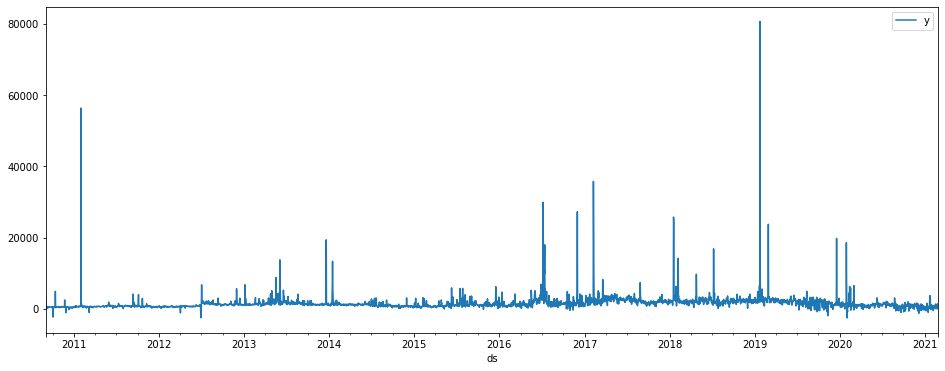

In [27]:
df.plot(figsize=(16, 6))

In [28]:
df.shape

(3834, 1)

In [29]:
train_data = df.iloc[:2757]
test_data = df.iloc[2757:]

In [30]:
print(train_data.shape)
print(test_data.shape)

(2757, 1)
(1077, 1)


In [31]:
train_data.tail()

,y
ds,
2018-03-15,2717.340
2018-03-16,2277.335
2018-03-17,1718.385
2018-03-18,1088.015
2018-03-19,1998.305


In [32]:
test_data.head()

,y
ds,
2018-03-20,1833.00
2018-03-21,1730.49
2018-03-22,2260.55
2018-03-23,2138.76
2018-03-24,1721.70


In [33]:
test_data = test_data.reset_index()

In [34]:
test_data

,ds,y
0,2018-03-20,1833.000
1,2018-03-21,1730.490
2,2018-03-22,2260.550
3,2018-03-23,2138.760
4,2018-03-24,1721.700
...,...,...
1072,2021-02-24,634.770
1073,2021-02-25,577.515
1074,2021-02-26,1445.495
1075,2021-02-27,488.980


In [35]:
train_data = train_data.reset_index()

In [36]:
train_data

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [37]:
from fbprophet import Prophet

In [38]:
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#Predict for the next 1077 days
#future = model.make_future_dataframe (periods=1077, freq='D')
forecast = model.predict(test_data)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,37.478369,4846.262815,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,311.790457,4944.514465,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,448.092559,5299.344591,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,183.818029,4880.057123,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-89.615053,4447.188842,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


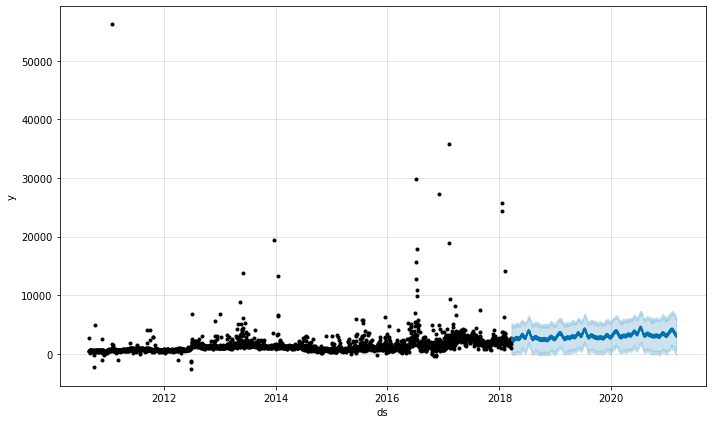

In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
model.plot(forecast)
plt.show()


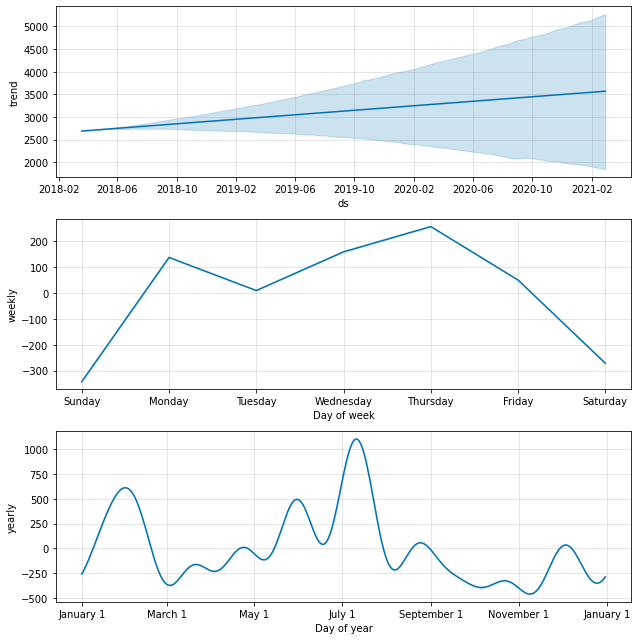

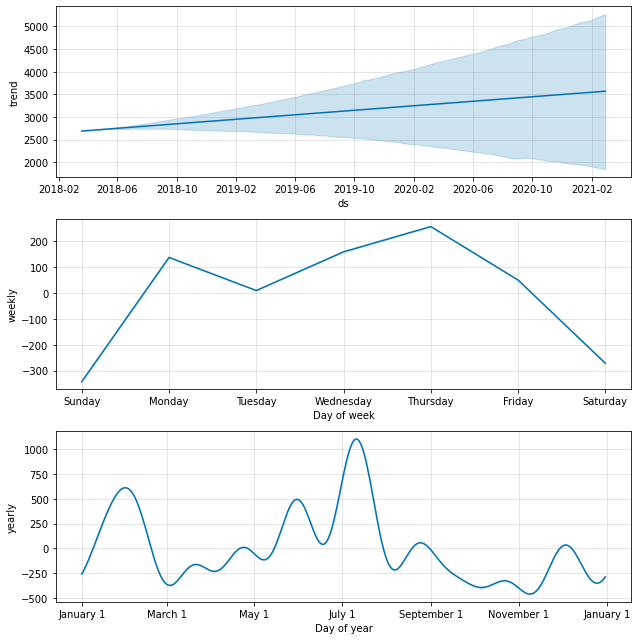

In [41]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(forecast)

In [42]:
forecast.shape

(1077, 19)

In [43]:
from sklearn import metrics
def calculate_MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [44]:
MAPE = calculate_MAPE(test_data['y'], forecast['yhat'])
print("The Mean Average Percentage Error is: ", round(MAPE, 2))

The Mean Average Percentage Error is:  549.48


**Question_15**

What is the RMSE in 2 decimal place? 3218.16

In [45]:
RMSE = np.sqrt(metrics.mean_squared_error(test_data['y'], forecast['yhat']))
RMSE = round(RMSE, 2)
RMSE

3218.16

**Question_16**. 

If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value?

**July**

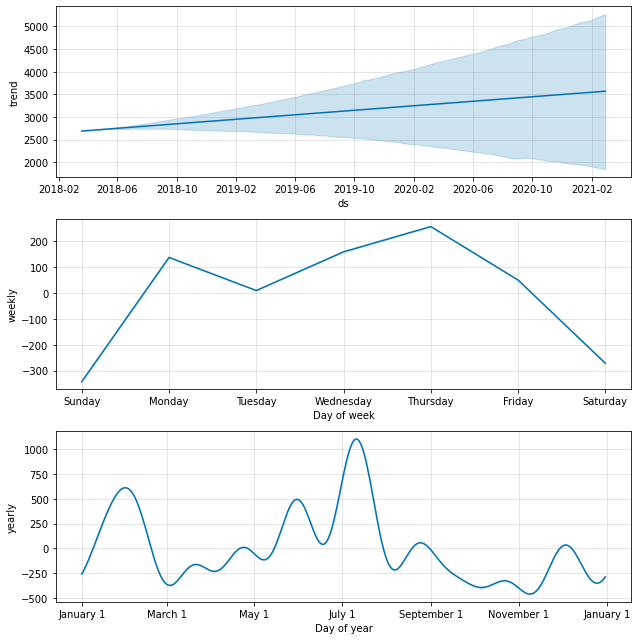

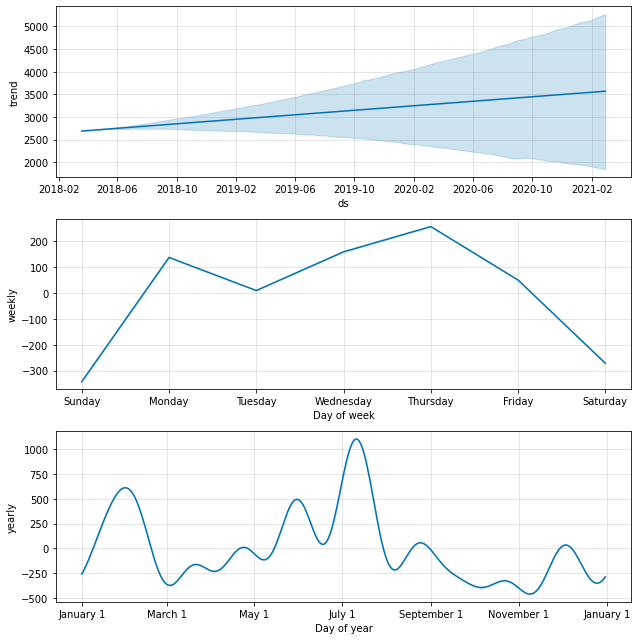

In [46]:
model.plot_components(forecast)

**Question_17**. 

Answer: 233.74

Multivariate Time Series Forecasting with Facebook Prophet In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [47]:
data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [48]:
data['FullDate'] = pd.to_datetime(data['FullDate'])

In [49]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [50]:
data.shape

(92016, 5)

In [51]:
data.set_index('FullDate', inplace=True)
data = data.resample('D').sum()
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [52]:
data.shape

(3834, 4)

In [53]:
data = data.reset_index()
data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [54]:
data2 = data.rename(columns={'FullDate':'ds', 'ElecPrice':'y', 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3'})
data2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [55]:
train_data = data2.iloc[:2757]
test_data = data2.iloc[2757:]

In [56]:
print(train_data.shape)
print(test_data.shape)

(2757, 5)
(1077, 5)


In [57]:
test_data

,ds,add2,add1,add3,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.000
2758,2018-03-21,571.2,4658.05865,203.2560,1730.490
2759,2018-03-22,722.4,19161.78525,203.2560,2260.550
2760,2018-03-23,811.2,18090.43435,198.6456,2138.760
2761,2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [58]:
#Creating the Model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [59]:
model = model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
prediction = model.predict(test_data)

In [61]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.816008,-220.099147,4342.116033,1866.816008,1866.816008,-854.927934,-854.927934,-854.927934,0.232346,...,-84.367504,-84.367504,-84.367504,-38.643882,-38.643882,-38.643882,0.0,0.0,0.0,1991.737865
1,2018-03-21,1867.512671,-136.510215,4204.191822,1867.512671,1867.512671,-1024.653099,-1024.653099,-1024.653099,0.229590,...,42.497418,42.497418,42.497418,-29.294910,-29.294910,-29.294910,0.0,0.0,0.0,1983.421127
2,2018-03-22,1868.209334,806.771629,5301.303942,1868.209334,1868.209334,-214.594937,-214.594937,-214.594937,0.216232,...,145.822951,145.822951,145.822951,-24.204766,-24.204766,-24.204766,0.0,0.0,0.0,2902.578272
3,2018-03-23,1868.905997,501.305117,4869.821188,1868.905997,1868.905997,-274.431734,-274.431734,-274.431734,0.208387,...,-44.133439,-44.133439,-44.133439,-23.232775,-23.232775,-23.232775,0.0,0.0,0.0,2586.725457
4,2018-03-24,1869.602660,-731.978400,3653.149116,1869.602660,1869.602660,-1074.613585,-1074.613585,-1074.613585,0.206479,...,-117.735502,-117.735502,-117.735502,-26.128782,-26.128782,-26.128782,0.0,0.0,0.0,1440.034805


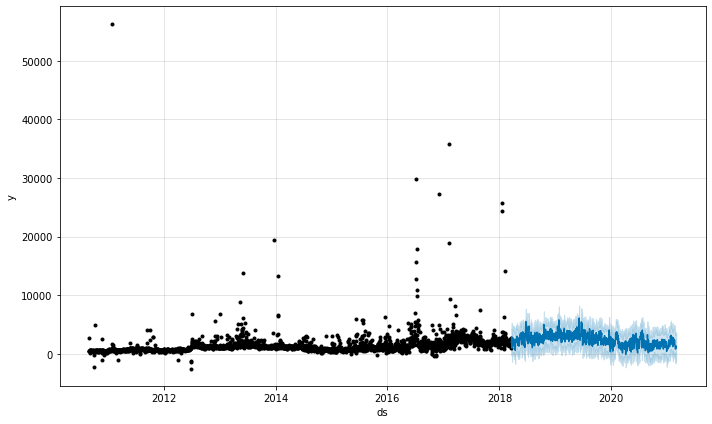

In [62]:
model.plot(prediction)
plt.show()

In [63]:
def calculate_MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [64]:
MAPE = calculate_MAPE(test_data['y'], prediction['yhat'])
print("The Mean Average Percentage Error is: ", round(MAPE, 2))

The Mean Average Percentage Error is:  233.74


**Question_18**.

What is the RMSE in 2 decimal place?

In [65]:
RMSE = np.sqrt(metrics.mean_squared_error(test_data['y'], prediction['yhat']))
RMSE = round(RMSE, 2)
RMSE

2709.65

**Question_19**. 

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?

**Tuesday and March**

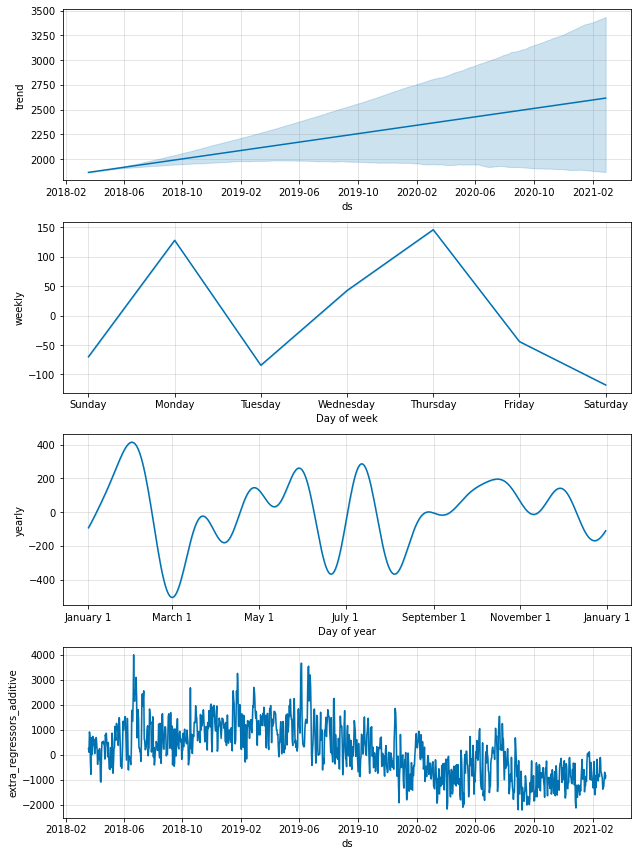

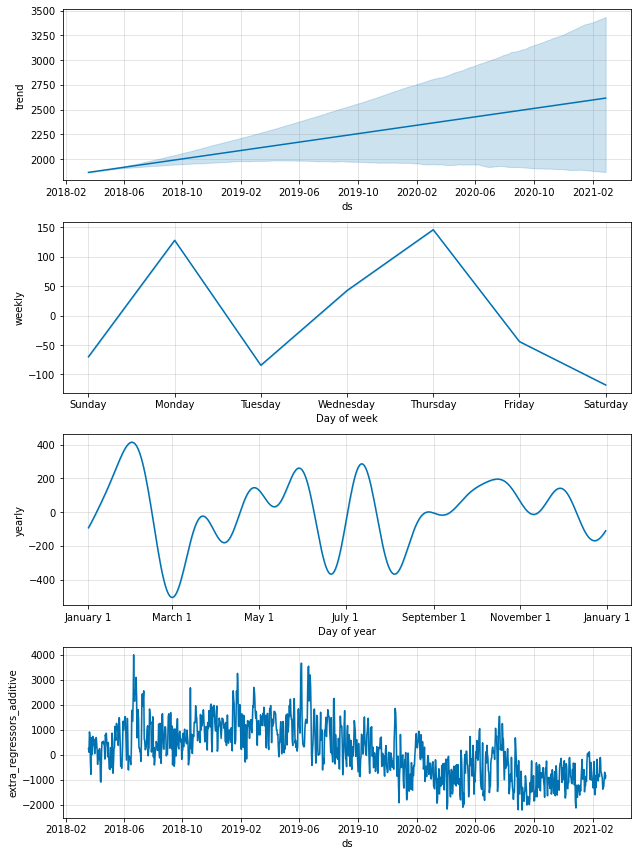

In [66]:
model.plot_components(prediction)

**Question_20**

Answer : 236.66



In [67]:
test_data2 = test_data[['ds', 'add1', 'add3', 'y']]

#Creating the Model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add3')

model = model.fit(train_data)
prediction = model.predict(test_data2)

MAPE = calculate_MAPE(test_data2['y'], prediction['yhat'])
print("The Mean Average Percentage Error is: ", round(MAPE, 2))



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The Mean Average Percentage Error is:  236.66
